<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/ANN_part2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

# Aim
In exercise lab I will learn how to code the backpropagation algorithm needed for parameter updates using gradient descent. 
This will enable me to complete the full class definition for a dense layer and popular activation functions used in neural nets. 

I will explore how loss is used to compute gradients and how these are pushed back so as to identify the effect of weights and biases on the loss at the output layer; and thereafter how an optimisation class can be created to carry out the parameter updates as part of the iterative gradient descent algorithm (where each iteration is referred to as an epoch). 

## Dense_Layer class from last week 

At the end of the lab you will be able to extend these classes to complete the backprop method. 

In [ ]:
class Activation_ReLU:
    def forward(self, x):
        return(np.maximum(0, x))

class Activation_Sigmoid:
    def forward(self, x):
        return(1 / (1 + np.exp(-x)))

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, n_weights=np.array([]), n_biases=np.array([])):
        # weights initialised from a gaussian with mean 0 and variance 1
        # multiply with a small value just to ensure we start with small weight values
        self.weights = n_weights
        self.biases = n_biases
        if n_weights.size==0: # if weights are not given then create them
          self.weights = 0.1*  np.random.normal(0.0, pow(n_inputs, -0.5), (n_inputs, n_neurons))
        if n_biases.size==0: # if biases are not given then create them
            self.biases = np.zeros((1, n_neurons))
   
    def forward(self, inputs, act):
        self.inputs = inputs #need this when backpropagating so maintain it in the layer class
        z = np.dot(inputs , self.weights) + self.biases # weights dot product
        self.outputs = act.forward(z) # nonlinear activation output of the layer

# 1. Backpropagation - on a toy example from lectures
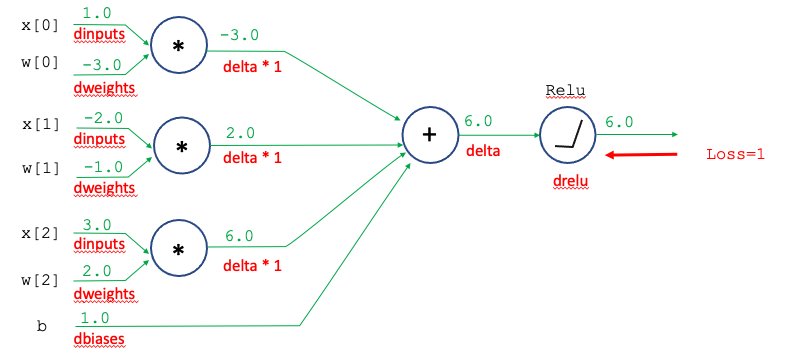

## <font color='red'>1.1 Exercises</font> with a computational graph
Given the above basic single neuron architecture drawn as a computational graph. Consider how you would use the Dense Layer to create a single node neuron with one output.
Thereafter do a forward pass and print the layer outputs.

Complete the code below.

In [ ]:
#SOLUTION 1.1
n_inputs = 3
n_neurons = 1
np.random.seed(42)
inputs = np.array(([1, -2, 3]))
#weights = np.array([[-3, -1, 2]]) # if you use this then you need to transpose weights at the dot product
weights = np.array(([-3.0], 
                   [-1.0], 
                   [2.0]))
biases = np.array([1.0])
act1 = Activation_ReLU()
dense1 = Layer_Dense(n_inputs,n_neurons, weights, biases)
dense1.forward(inputs, act1)
layer_output = dense1.outputs
print("Layer output")
print(layer_output)

Layer output
[6.]


## <font color='red'>1.2 Exercises</font> derivatives of activations
Backpropagation starts once the loss is computed. Suppose you have a loss of 1 where 

$loss = predicted - target$


How would you compute the gradient wrt to Relu?
Note: gradient computations for each activation function appears in column2 table below. In your code if we want to use the gradient from, say a ReLU activation, then lets store the gradient in a variable called drelu (to differentiate it from the forward relu output); and similarly for other activation function names. 


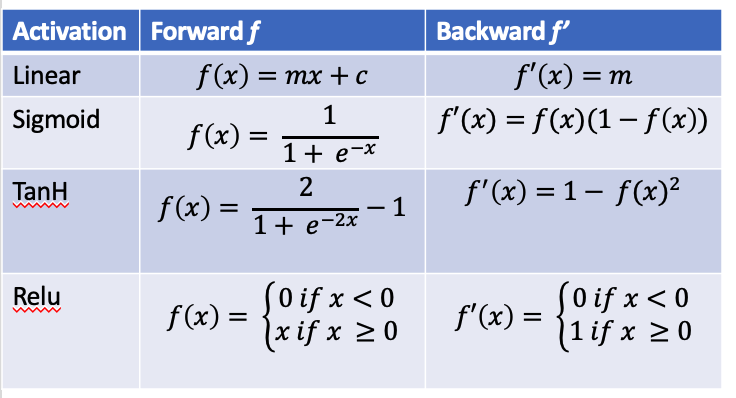



In [ ]:
# SOLUTION 1.2
drelu = (np.greater_equal(dense1.outputs, 0).astype(int)) # inputs > 0 then convert bools (true/false) to int
print("drelu \n",drelu)

drelu 
 [1]



## <font color='red'>1.3 Exercises</font> gradient flow through the neuron
Compute the derivative values for delta, dweights, dbias and dinputs. As in the figure lets assume a loss of 1. 

In [ ]:
#SOLUTION 1.3
loss = 1
delta = drelu * loss

dweights = np.dot(delta, dense1.inputs)
print("dweights=> ", dweights)
print("\t shapes delta{} x inputs{} => dweights {} ".format(delta.shape, np.asarray(dense1.inputs.shape), np.asarray(dweights.shape)))

dbiases = delta # ok for now - needs improved (see next section)
dinputs = np.dot(delta, dense1.weights.T)
print("dinputs=> ", dinputs)
print("\t shapes delta{} x weights.T{} => {} \n".format(delta.shape, np.asarray(dense1.weights.T.shape), np.asarray(dinputs.shape)))


ValueError: ignored

## <font color='red'>1.4 Exercises</font> multiple instances in Backprop
Add 3 more input instances and explore the equations again
 [2, -2, 5],
 [-5, 3, -2],
 [-6, 0, -1]

In [ ]:
#SOLUTION 1.4
inputs = np.array([[1, -2, 3],
                   [2, -2, 5],
                   [-5, 3, -2],
                   [-6, 0, -1]])
print("inputs.shape", format(inputs.shape))
weights = np.array([[-3.0], 
                   [-1.0], 
                   [2.0]])

print("weights.shape", format(weights.shape))
biases = np.array([[1.0]])
print("biases.shape", format(biases.shape))

n_inputs = 3
n_neurons = 1
act1 = Activation_ReLU()
dense1 = Layer_Dense(n_inputs,n_neurons, weights, biases)
dense1.forward(inputs, act1)
layer_output = dense1.outputs
print("Layer output")
print(layer_output)

loss = 1 # assume loss of 1

#drelu here
drelu = (np.greater_equal(dense1.outputs, 0).astype(int)) # inputs > 0 then convert bools to int
print("drelu\n", drelu)

#delta here
delta = drelu * loss
print("delta = drelu * loss\n", delta) 

#dinputs here
dinputs = np.dot(delta, dense1.weights.T)
print( "dinputs\n", dinputs)
print("\t shapes delta{} x weights.T{} => dinputs{} \n".format(delta.shape, np.asarray(dense1.weights.T.shape), np.asarray(dinputs.shape)))

#dweights here
dweights = np.dot(dense1.inputs.T, delta)
print("dweights\n", dweights)
print("\t shapes inputs.T{} x delta{}  => dweights {} \n".format(np.asarray(dense1.inputs.T.shape), delta.shape,  np.asarray(dweights.shape)))

#since the gradients shape dimensions must match the original shape ; we need to ensure
# that dbiases shape is similar to the biases shape
# otherwise we wont be able to tweak biases at the update step
dbiases = np.sum(delta, keepdims=True, axis=0 )
print("dbiases \n", dbiases)
print("\t shapes dbiases{} \n".format(dbiases.shape))


## <font color='red'>1.5 Exercises</font> working with a layer of neurons in Backprop
Add a few more neurons (e.g. 2) and explore the equations again. 

Assume we have the following targets for each instance.

[[ 1.  1.],

 [ 2.  2.],

 [ -5.  -3.],

 [-6.  -4.]]

Use the targets now to compute the loss. 

In [ ]:
#SOLUTION 1.5
inputs = np.array([[1, -2, 3],
                   [2, -2, 5],
                   [-5, 3, -2],
                   [-6, 0, -1]])

targets = np.array([[1., 1.],
                    [2., 2.],
                    [ -5., -3.],
                    [-6., -4.]])

weights = np.array([[-3, 5],  [-1, 8],   [2, -4]]).astype(float)
biases = np.array([[1,1]]).astype(float)

n_inputs = 3
n_neurons = 2
act1 = Activation_ReLU()
# complete for 3 inputs and 2 neurons
dense1 = Layer_Dense(n_inputs, n_neurons, weights, biases) #send these weights and biases
dense1.forward(inputs, act1)
layer_output = dense1.outputs
print("Layer output")
print(layer_output)

#calculate loss here
loss = layer_output - targets
print("loss")
print(loss)

#drelu here
drelu = (np.greater_equal(dense1.outputs, 0).astype(int)) # inputs > 0 then convert bools to int
print("drelu")
print(drelu)

delta = drelu * loss
print("delta")
print(delta)
dbiases = np.sum(delta, keepdims=True, axis=0 )
print("dbiases \n", dbiases)
dweights = np.dot(dense1.inputs.T, delta)
print("dweights\n", dweights)
print("\t shapes inputs.T{} x delta{}  => dweights {} ".format(np.asarray(dense1.inputs.T.shape), delta.shape,  np.asarray(dweights.shape)))
print("shape weights", weights.shape)
dinputs = np.dot(delta, dense1.weights.T)
print("dinputs")
print( dinputs)
print("\t shapes delta{} x weights.T{} => dinputs{} \n".format(delta.shape, np.asarray(dense1.weights.T.shape), np.asarray(dinputs.shape)))
print("shape inputs", inputs.shape)

## <font color='red'>1.6 Exercises</font>  updating weights and biases
Once we know how to calculate the gradients (i.e. dweights and dbiases) we are able to adjust the weights and biases with the goal of lowering loss.

This process of adjusting weights and biases using gradients to decrease loss is the job of the optimizer.

The gradient descent optimizer has the following weight update equation:

$ \mathbf \theta_{n+1}=\mathbf {\theta} _{n}-\eta \nabla F(\mathbf {\theta} _{n})$

where
$ \nabla F(\mathbf {\theta} _{n})$ 
are the gradients that were calculated; and
$\eta $ is the learning rate. $\theta$ are the parameters (dweights and dbiases) and $n$ refers to the previous and $n+1$ refers to the updated weights.

### Calculating weight updates

How would you use the equation above to update the dense1.weights and dense1.biases?

In [ ]:
#SOLUTION 1.6
print("before update dense1.weights: \n {}".format(dense1.weights))
print("before update dense1.biases: \n {}".format(dense1.biases))
# Update parameters using gradient descent equation
dense1.weights += -0.001 * dweights
dense1.biases += -0.001 * dbiases
print("----------------------")
print("Updated dense1.weights  \n{}".format(dense1.weights))
print("Updated dense1.biases  \n{}".format(dense1.biases))

## <font color='red'>1.7 Exercises</font>  descending on loss
Use the updated weights and biases to carry out a further forward pass and study if the update has managed to reduce the loss.


In [ ]:
#SOLUTION 1.7
# we have outputs from n_neurons for which we can calculate the loss for each
print("Loss@iteration 1: \n{}".format(loss))

#carry out a forward pass
dense1.forward(inputs, act1)
#print the layer outputs
layer_outputs = dense1.outputs
#compute the loss
loss = layer_outputs - targets

print("Loss@iteration 2: \n{}".format(loss))

## <font color='red'>1.8 Exercises</font> iterative weight updates
1.   Write a for loop to carry out 10 iterations of the forward and backward passes. Print the loss at each iteration to check if updates to parameters help reduce loss.
2. Use the mean squared error (in the sklearn library) to evaluate performance. 

In [ ]:
#SOLUTION 1.8
n_neurons = 3
n_inputs = 4
np.random.seed(42)
lr = 0.001 # set the learning rate

inputs = np.array([[1, 2, 3, 2.5],
                   [2., 5., -1., 2],
                   [-1.5, 2.7, 3.3, -0.8]])
targets = np.array([[-0.51815938, -0.97314055 , -1],
                   [-1.59427576, -2 , -2 ],
                   [-2.59277682, -2.87607744 , -3]])

act1 = Activation_ReLU()
dense1 = Layer_Dense(n_inputs,n_neurons)

from sklearn.metrics import mean_squared_error

for i in range(10): # do this for 10 epochs
  #forward pass
  dense1.forward(inputs, act1)
  layer_outputs = dense1.outputs

  # compute loss
  loss = (layer_outputs - targets)
  mse =  mean_squared_error(layer_outputs , targets)
  print("{} mse: {} ".format(i,mse))

  # carryout backprop
  drelu=np.asarray([(np.greater_equal(x, 0).astype(int)) for x in layer_outputs])
  delta = drelu * loss
  dinputs = np.dot(delta, dense1.weights.T)
  dweights = np.dot(inputs.T, delta)
  dbiases = np.sum(delta, axis=0, keepdims=True)
  
  #update the weights
  dense1.weights += -lr * dweights
  dense1.biases += -lr * dbiases


# 2. Completing the Dense_Layer and activation classes 

### <font color='red'>2.1 Exercises</font> Backprop for Activation Classes

Complete the backward pass code for ReLU and Sigmoid. 
Thereafter you can expand this class to include linear, leaky rely and tanh (using the equations from above and lecture slides). 

In [ ]:
class Activation_ReLU:
    def forward(self, x):
        return(np.maximum(0, x))
    def backward(self, x):
        #complete code here
        return(np.greater_equal(x, 0).astype(int)) # inputs > 0 then convert bools to int
        
class Activation_Sigmoid:
    def forward(self, x):
        return(1 / (1 + np.exp(-x)))
    def backward(self, x):
        #Complete code here
        return(x * ( 1 - x))

### <font color='red'>2.2 Exercises</font> Backprop for Layer_Dense class

Complete the backward pass code for Layer_Dense. 

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, n_weights=np.array([]), n_biases=np.array([])):
        # weights initialised from a gaussian with mean 0 and variance 1
        # multiply with a small value just to ensure we start with small weight values
        self.weights = n_weights
        self.biases = n_biases
        if n_weights.size==0:
          self.weights = 0.1*  np.random.normal(0.0, pow(n_inputs, -0.5), (n_inputs, n_neurons))
        if n_biases.size==0:
            self.biases = np.zeros((1, n_neurons))

       
    def forward(self, inputs, act):
        self.inputs = inputs #need this when backpropagating so maintain it in the layer class
        z = np.dot(inputs , self.weights) + self.biases # weights dot product
        self.outputs = act.forward(z) # nonlinear activation output of the layer
        

    def backward(self, error, act):
      delta = error * act.backward(self.outputs)
      self.dinputs = np.dot(delta, self.weights.T)
      #self.dweights = np.mean(np.dot(self.inputs.T, delta))
      self.dweights = np.dot(self.inputs.T, delta)
      self.dbiases = np.sum(delta, axis=0, keepdims=True)
      
     

### <font color='red'>2.3 Exercises</font> Create a optimization class with gradient descent

Complete the weight update code.  

In [ ]:
class Optimizer_SGD:
    def __init__(self, learningrate=0.3):
           self.lr = learningrate
            
    def weight_update(self, layer): 
        layer.weights -= self.lr * layer.dweights
        # complete the code here for bias update
        layer.biases -= self.lr * layer.dbiases

#### Creating  Layers
There are many hyper parameters (note parameters are optimised during training and hyperparameters are decisions made by the end-user when setting up the model) that needs to be tuned in an Artificial Neural Net (ANN). Two main hyperparameters that control the architecture or topology of the network are: 
- the number of layers; and 
- the number of nodes in each hidden layer.

Theoretical findings and proof has shown that ANNs are universal approximators. That with one hidden layer, it can approximate any function that we require. Specifically, the universal approximation theorem states that a feedforward network with a linear output layer and at least one hidden layer with any “squashing” activation function (such as the logistic sigmoid activation function) can approximate any measurable function from one finite-dimensional space to another with any desired non-zero amount of error, provided that the network is given enough hidden units. 

Lets use the Dense_Layer class to create such a basic network with a single hidden layer.  
- layer1 (the hidden layer) which has a weight matrix and receives the input directly from the instances or inputs; and 
- output (the neural prediction layer) which also has its weight matrix and outputs neural prediction. 

Note that you can ofcourse have several hidden layers before the final output layer. You can try that out later in the exercises. 



In order to try out the basic ANN lets load up the MNIST data. 

In [ ]:
train_file = "sample_data/mnist_train_small.csv"
test_file = "sample_data/mnist_test.csv"


#3. Creating an initial model for MNIST data

The MNIST data is normalised such that the 0-255 pixel range is brought down to a range [0.01-1]. This forms the X_train part of the data. 

The train_y part of the data consists of the class information. When using an ANN we must match the number of output nodes in the last layer with the number of classes in the data. Since MNIST has 10 classes the output layer will have 10 nodes. 

Accordingly the y data needs to be organised into a one-hot-encoded representation. This is best explained in the figure. Both the train and test data must be preprocessed in the same manner.
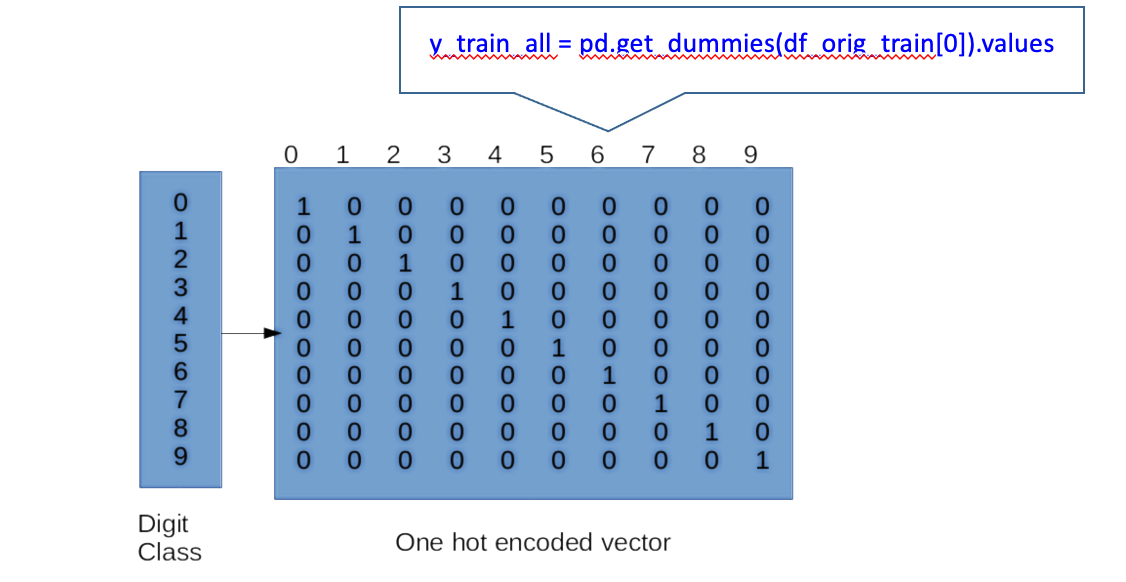


In [ ]:
# datasets to read
# you can change these when trying out other datasets
train_file = "sample_data/mnist_train_small.csv"
test_file = "sample_data/mnist_test.csv"

df_orig_train = pd.read_csv(train_file, header=None)  # read entire train dataset
df_orig_test = pd.read_csv(test_file, header=None)  # read entire test dataset
df_orig_train.info()

y_train_all =  pd.get_dummies(df_orig_train[0]).values # this is the class column
X_train_all = df_orig_train.drop(0, axis = 1).values # maintain all columns after dropping the class column
print(y_train_all.shape)
print(X_train_all.shape)

y_test_all =  pd.get_dummies(df_orig_test[0]).values
X_test_all = df_orig_test.drop(0, axis = 1).values
print(y_test_all.shape)
print(X_test_all.shape)

# Select smaller samples of the train and test datasets (will execute faster when training our networks than using the entire dataset)
train_sample_size = 10000  # choosing a smaller sample instead of the entire dataset
print("Percentage of training data used: ", train_sample_size/len(y_train_all) * 100)
test_sample_size = 2000 # len(y_test_all)
print("Percentage of testing data used: ", test_sample_size/len(y_test_all) * 100)

# get indices for random sampling
random_indices = np.random.choice(range(len(y_train_all)), train_sample_size, replace = False)
# get a smaller random sample
X_train = X_train_all[random_indices]
y_train = y_train_all[random_indices]
print(y_train.shape)
print(X_train.shape)
#preprocessing steps to normalise the mnist data
X_train = (X_train / 255.0 * 0.99) + 0.01 # scale and shift the inputs
y_train = y_train + 0.01 # lets bring it to a range between 0.01 and 1.01
y_train = np.where(y_train != 1.01, y_train, 0.99) # change all the 1.01 to 0.99 giving us a range between 0.01 to 0.99

#### Helper function for accuracy metric

In [ ]:
def accuracy(targets, predictions):
    """
    Calculates the accuracy of a model's predictions.
    """
    prediction_labels = np.argmax(predictions, axis=1)
    target_labels = np.argmax(targets, axis=1)
    predictions_correct = (prediction_labels == target_labels.round())
    accuracy = predictions_correct.mean()
    return accuracy

### <font color='red'>3 Exercises</font> Creating a model for MNIST character recognition task

We want to use the completed class definitions to learn an ANN model for the MNIST data.
This requires creation of the hidden layers and associated activations as well as computing the weight updates using the 
Optimizer_SGD class.


Lets create the followin ANN model with a single hidden layer. 
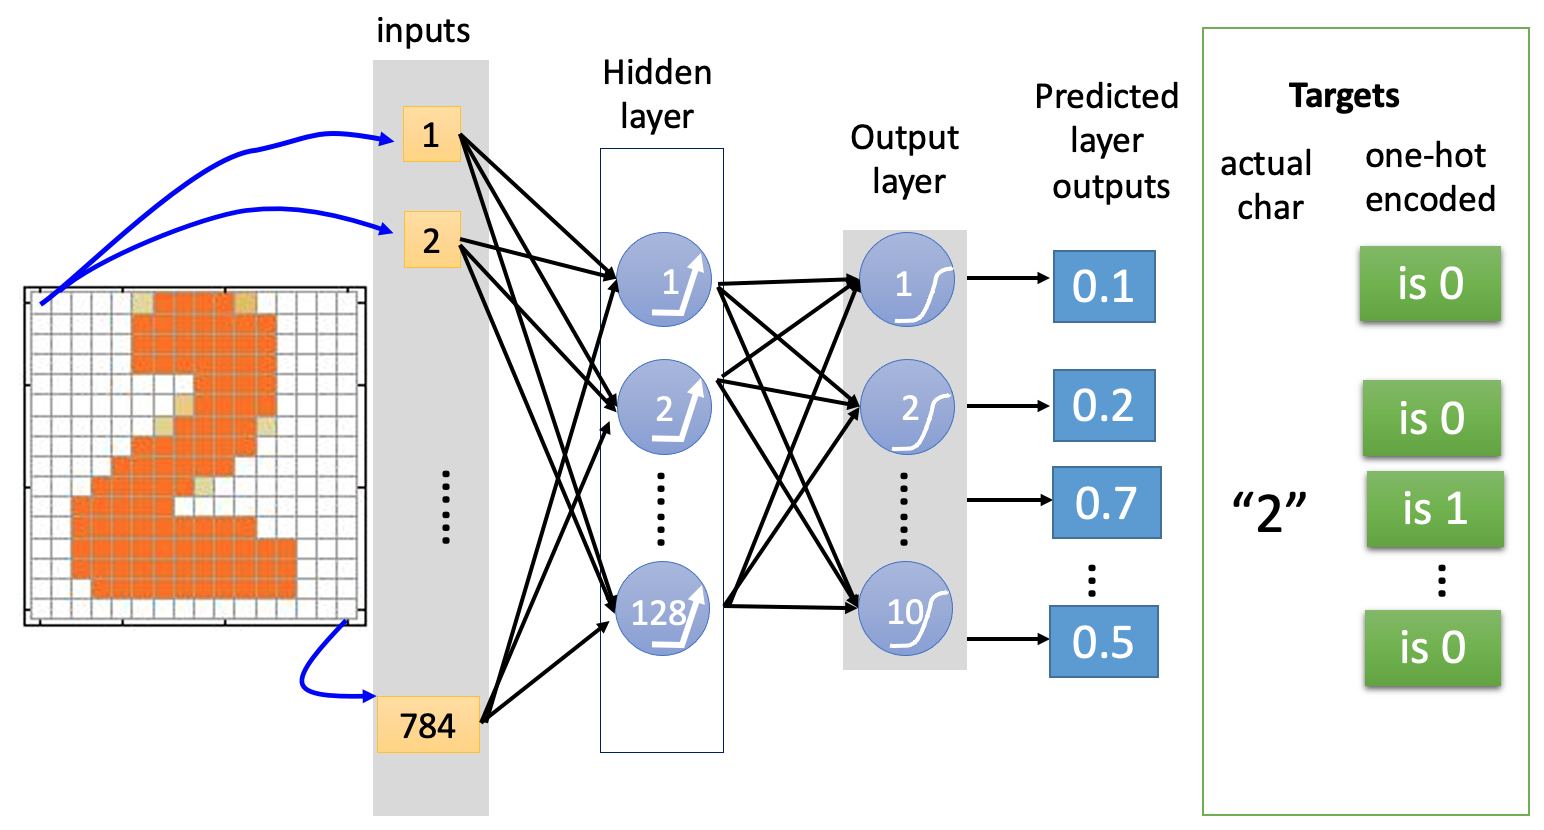


In [ ]:
layer1 = Layer_Dense(784, 128) # set the weight matrix dimensions (input nodes x hidden nodes)
#complete for layer2 which is the output layer
layer2 = Layer_Dense(128, 10) # set the weight matrix dimensions (hidden nodes x output nodes)

#each layer must have some form of activation add these as suggested in the figure
#complete code
activation1 = Activation_ReLU()
activation2 = Activation_Sigmoid()

In [ ]:
# complete code for optimizer
learning_rate = 0.3
opt  = Optimizer_SGD(learning_rate)

# maintain a dataframe to keep track of the network error
monitoring = {}
monitoring['mean_squared_error'] = []
monitoring['accuracy'] = []

# iterate and update weights at each epoch
for epoch in range(10):
    #complete code for forward pass
    layer1.forward(X_train, activation1)   
    layer2.forward(layer1.outputs, activation2)
 
    #complete code to calculate the loss
    loss=(layer2.outputs - y_train)
    
    # train metrics
    pred = layer2.outputs
    mse = mean_squared_error(pred, y_train)
    acc = accuracy(pred, y_train)
    monitoring['mean_squared_error'].append(mse)
    monitoring['accuracy'].append(acc)

    # complete code to backprop through the layers
    layer2.backward(loss, activation2)
    layer1.backward(layer2.dinputs, activation1)

    # complete code to update all the layer weights
    opt.weight_update(layer2)
    opt.weight_update(layer1)



monitoring_df = pd.DataFrame(monitoring)   
monitoring_df

In [ ]:
import matplotlib.pyplot as plt 
instance = X_train[1]
image_array = np.asfarray(instance).flatten().reshape((28,28))

# print the grid in grey scale
plt.imshow(image_array, cmap='Greys', interpolation='None') 

You will see that both accuracy and error metrics suggests that our neural net is not performing well. This is because we have not considered the use of stochastic gradient descent or mini-batches within the epochs.

Next week we will learn how to incorporate these refinements and acheive better optimisation. 

# Misc Code - used for lecture examples

In [ ]:
# Suppose we have 3 sets of inputs - training instances
inputs = np.array([[2, 3, 2.5],
                   [5., -1., 2],
                   [2.7, 3.3, -0.8]])
print("inputs.shape=> ", inputs.shape)
np.random.seed(42)
act1 = Activation_ReLU()
dense1 = Layer_Dense(3,2)
dense1.forward(inputs, act1)
layer_outputs = dense1.outputs
print("Layer output")
print(layer_outputs)

In [ ]:
# We have 2 sets of weights - one set for each neuron
# we have 3 inputs, thus 3 weights into a neuron
# we have one bias for each neuron
# biases are the row vector with a shape (1, neurons)

print("Layer weights:\n{}".format(dense1.weights))
print("dense1.weights.shape ", dense1.weights.shape)
print("Layer biases:\n{}".format(dense1.biases))
print(dense1.biases.shape)

## Loss values as upstream gradients

In [ ]:
targets = np.array([[-0.86425857,  -0.78596364],
                   [-1.92104299,  -2 ],
                   [-2.78835361,  -2.72056279]])
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
loss = layer_outputs - targets
print(loss)


## Derivative for ReLU Activation
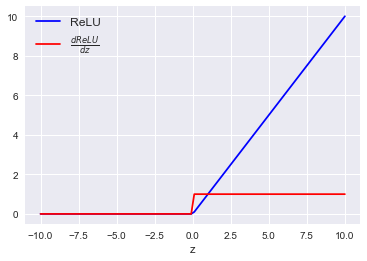

In [ ]:
# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation

outputs = layer_outputs.copy()
drelu=[(np.greater_equal(x, 0).astype(int)) for x in layer_outputs] # create the list and convert to a numpy array with asarray
print("This is the drelu matrix shape for our toy example in the figure: \n {}".format(np.asarray(drelu)))
print("This is the drelu matrix shape: \n {}".format(np.asarray(drelu).shape))


## Derivative of ReLU wrt the loss using chain rule

In [ ]:
# local gradient * upstream gradient
delta = drelu * loss
print(delta)


## Derivative to pass to downstream neuron layer

In [ ]:
# Use chain rule and multiply delta with weights to get dinputs
# since multiplication is like switching of gradient flows
dinputs = np.dot(delta, dense1.weights.T)

print("This is the dweights matrix for our toy example in the figure => {}".format(np.asarray(dinputs.shape)))
print(dinputs)
print("shapes delta{} x weights.T{} => {} \n".format(delta.shape, np.asarray(dense1.weights.T.shape), np.asarray(dinputs.shape)))



## Derivatives to tweak the weights and biases

In [ ]:
# dweights - multiply by inputs
N = dinputs.shape[0]
dweights = np.dot(inputs.T, delta)
# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(delta, axis=0, keepdims=True)

print("This is the shape of the dweights matrix for our toy example in the figure => {}".format(np.asarray(dweights).shape))
print(dweights)
print("shapes inputs.T{} x drelu{} => {} \n".format(np.asarray(inputs.T.shape), delta.shape, np.asarray(dweights.shape)))

print("This is the dbiases matrix for our toy example in the figure => {}".format(np.asarray(dbiases.shape)))
print(dbiases)
print("dbiases is a sum over delta columns\n {} ".format(delta))


##  Update parameters

In [ ]:
print("before update dense1.weights: \n {}".format(dense1.weights))
print("before update dense1.biases: \n {}".format(dense1.biases))
# Update parameters
dense1.weights += -0.001 * dweights
dense1.biases += -0.001 * dbiases

print("Updated dense1.weights : \n{}".format(dense1.weights))
print("Updated dense1.biases : \n{}".format(dense1.biases))
